In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
%matplotlib inline
 
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
 
    

# sales_data = pd.read_csv('retail_sales.csv')
# sales_data['date']=pd.to_datetime(sales_data['date'])
# sales_data.set_index('date', inplace=True)
 
# sales_data.plot()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# data = pd.read_csv("PowerData.csv",index_col=0)
# data = data.loc['1985-01-01':]

data = pd.read_csv("SMARD_Realisierter_Stromverbrauch_201811170000_202011122345_1.csv")

data['Date'] = data['Date'].astype('str')
data['Time'] = data['Time'].astype('str')
data['Date'] = data['Date'] + ' '+ data['Time']

data.set_index('Date', inplace=True)
# data = data.assign(Date=data.Date.dt.round('H'))
# data = data.assign(Date=data.Date.dt.round('H'))
data.head()

,Time,Demand[MWh]
Date,,
17.11.2018 00:00,00:00,118
17.11.2018 00:15,00:15,11175
17.11.2018 00:30,00:30,110
17.11.2018 00:45,00:45,109
17.11.2018 01:00,01:00,1075


In [3]:
data.index = pd.to_datetime(data.index)
data = data['Demand[MWh]']
data.columns = ['Energy Production']
print(len(data))
data = data.sort_index()
# data.columns
data = data['2019-01-01 00:00':'2019-06-01 00:00,']

35016


In [4]:
data.columns = ['Energy Production']
data.head()

Date
2019-01-01 00:00:00    13225
2019-01-01 00:15:00    12475
2019-01-01 00:30:00      125
2019-01-01 00:45:00    13175
2019-01-01 01:00:00    13025
Name: Demand[MWh], dtype: int64

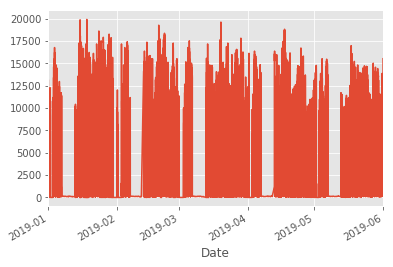

In [11]:
data = data.astype('float64')
data.head()
data.plot()

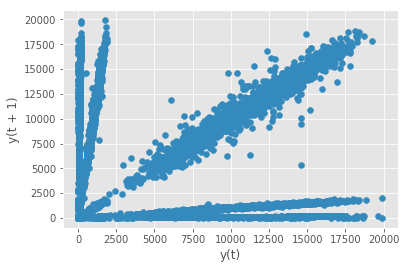

In [12]:
pd.plotting.lag_plot(data)

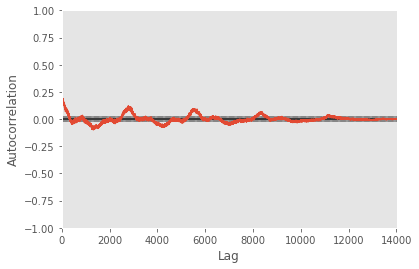

In [13]:
pd.plotting.autocorrelation_plot(data)

In [14]:
data.corr(data.shift(48))

0.17607391338651524

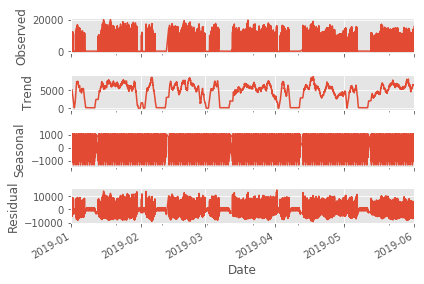

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data, model='additive', freq=96)
x = decomposed.plot() #See note below about this

In [16]:
dt = data.copy(deep=True)
dt= data.diff()
dt= data.diff()
dt= data.diff()
dt= data.diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()
# dt['Energy Production'] = dt['Energy Production'].diff()

In [17]:
data.head()

Date
2019-01-01 00:00:00    13225.0
2019-01-01 00:15:00    12475.0
2019-01-01 00:30:00      125.0
2019-01-01 00:45:00    13175.0
2019-01-01 01:00:00    13025.0
Name: Demand[MWh], dtype: float64

In [18]:
dt = dt.iloc[4:]
dt.head()

Date
2019-01-01 01:00:00     -150.0
2019-01-01 01:15:00   -12913.0
2019-01-01 01:30:00     9663.0
2019-01-01 01:45:00    -9775.0
2019-01-01 02:00:00     9825.0
Name: Demand[MWh], dtype: float64

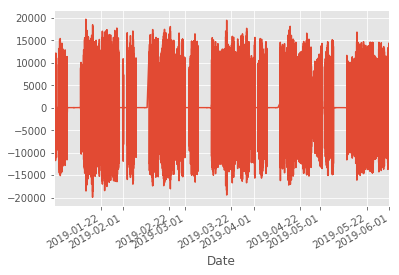

In [19]:
dt.plot()

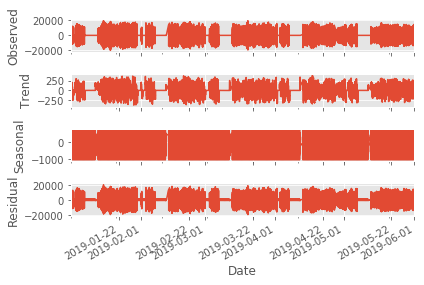

In [20]:
decomposed = seasonal_decompose(dt, model='additive', freq=48)
x = decomposed.plot()

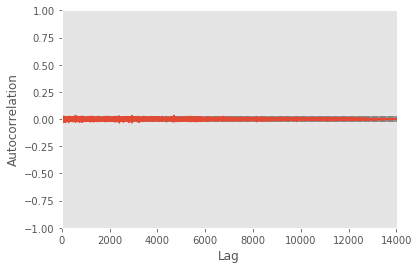

In [21]:
pd.plotting.autocorrelation_plot(dt)

In [22]:
from statsmodels.tsa.ar_model import AR
 
#create train/test datasets
X = dt.dropna()
train_data = X[:int((len(X)*70)/100)]
test_data = X[int((len(X)*70)/100):]
 
#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [23]:
print('The lag value chose is: %s' % model_fitted.k_ar)
 
 
print('The coefficients of the model are:\n %s' % model_fitted.params)
 


The lag value chose is: 38
The coefficients of the model are:
 const              2.920284
L1.Demand[MWh]    -0.896010
L2.Demand[MWh]    -0.821759
L3.Demand[MWh]    -0.741064
L4.Demand[MWh]    -0.674077
L5.Demand[MWh]    -0.623775
L6.Demand[MWh]    -0.580742
L7.Demand[MWh]    -0.540869
L8.Demand[MWh]    -0.505150
L9.Demand[MWh]    -0.471871
L10.Demand[MWh]   -0.438132
L11.Demand[MWh]   -0.408843
L12.Demand[MWh]   -0.380084
L13.Demand[MWh]   -0.348340
L14.Demand[MWh]   -0.300696
L15.Demand[MWh]   -0.276380
L16.Demand[MWh]   -0.256861
L17.Demand[MWh]   -0.262092
L18.Demand[MWh]   -0.276113
L19.Demand[MWh]   -0.274689
L20.Demand[MWh]   -0.257093
L21.Demand[MWh]   -0.245855
L22.Demand[MWh]   -0.241342
L23.Demand[MWh]   -0.222124
L24.Demand[MWh]   -0.216890
L25.Demand[MWh]   -0.212156
L26.Demand[MWh]   -0.199844
L27.Demand[MWh]   -0.199210
L28.Demand[MWh]   -0.190100
L29.Demand[MWh]   -0.162793
L30.Demand[MWh]   -0.167161
L31.Demand[MWh]   -0.163255
L32.Demand[MWh]   -0.152305
L33.Demand[MW

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


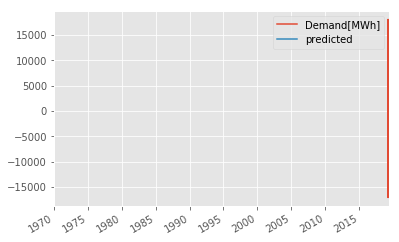

In [24]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
 
# create a comparison dataframe
compare_df = pd.concat(
    [X[int((len(X)*70)/100):],
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})
 
#plot the two values
compare_df.plot()

In [25]:
from sklearn.metrics import r2_score
 
r2 = r2_score(X[int((len(X)*70)/100):], predictions)
r2

0.0004929477581457897

In [26]:
import math
from sklearn.metrics import mean_squared_error


# trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)

# ytrain = scaler.inverse_transform([Ytrain])
# ytest = scaler.inverse_transform([Ytest])
    
# trainScore = math.sqrt(mean_squared_error(ytrain[0], X[:int((len(X)*70)/100)]))    
# print("train Score", trainScore)

testScore = math.sqrt(mean_squared_error(X[int((len(X)*70)/100):], predictions))    
print("train Score", testScore)
# print(ytest[0])

train Score 6676.23284486615
